In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data cleaning and exploration

In [2]:
df = pd.read_csv('Europe_Bike_Store_Sales.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [4]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [5]:
df.describe(include='object')

,Date,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
count,113036,113036,113036,113036,113036,113036,113036,113036,113036
unique,1884,12,4,2,6,53,3,17,130
top,2014-03-01,June,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,288,11234,55824,58312,39206,22450,70120,33870,10794


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.duplicated().sum()

np.int64(1000)

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [10]:
df['Revenue'] = df['Order_Quantity'] * df['Unit_Price']
df['Cost'] = df['Order_Quantity'] * df['Unit_Cost']
df['Profit'] = df['Revenue'] - df['Cost']
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1725,1035,2760
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1500,900,2400
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480


# Revenue Analysis Insights

## Key Observations
- Revenue grew from ~\$10M (2011) to ~\$20M (2016) - **100% growth over 5 years**
- **Peak revenue**: \$22M in 2015
- **Highest growth**: 2012-2013 (70% increase from \$10M to \$17M)
- **Most volatile period**: 2013-2015 with significant ups and downs

## Trends
- **2011-2012**: Flat performance (~\$10M)
- **2013**: Major growth surge to \$17M
- **2014**: Decline to \$15.5M
- **2015**: Recovery to peak \$22M
- **2016**: Moderate decline to \$19.5M

## Summary
Strong overall growth with high volatility in recent years. Business shows good growth potential but revenue consistency needs improvement.

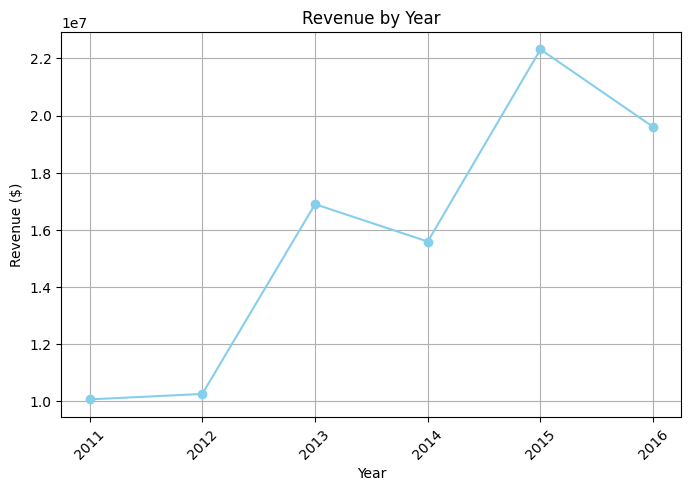

In [205]:
revenueByYear = df.groupby('Year')['Revenue'].sum()
revenueByYear.plot(kind='line', title='Revenue by Year',marker ='o', figsize=(8,5), color='skyblue')
plt.xticks(rotation = 45)
plt.ylabel('Revenue (M$)')
plt.grid()
plt.show()

## Product Category Analysis
**Key Observations:**
- **Accessories dominate**: ~1M total order quantity (>80% of all orders)
- **Bikes**: Minimal orders (~50K quantity)
- **Clothing**: Moderate orders (~250K quantity)

**Summary:** Accessories are the primary volume driver, suggesting strong demand for supplementary products.

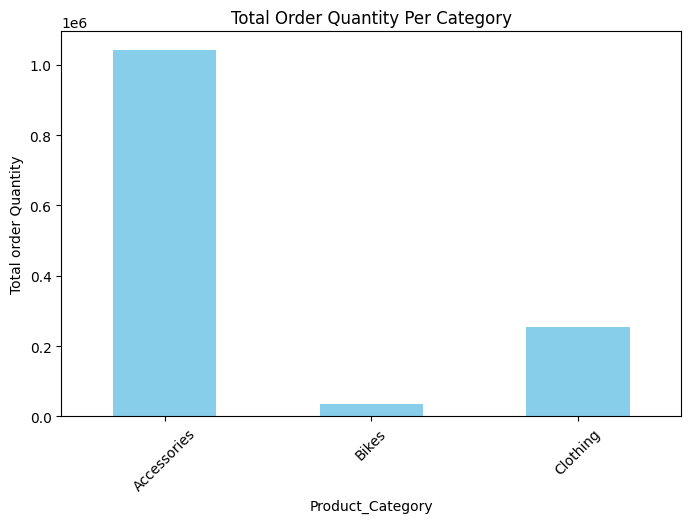

In [203]:
quantityByCategory = df.groupby('Product_Category')['Order_Quantity'].sum()
quantityByCategory.plot(kind = 'bar', title = 'Total Order Quantity Per Category', figsize=(8,5), color='skyblue')
plt.xticks(rotation = 45)
plt.ylabel('Total order Quantity')
plt.show()

## Monthly Revenue Trends
**Key Observations:**
- **Peak months**: May (\~\$10M) and December (\~\\$10.2M)
- **Lowest months**: July-August (~\$6.4M each)
- **Seasonal pattern**: Strong Q4 performance, summer dip

**Summary:** Clear seasonality with holiday/year-end peaks and summer slowdown.

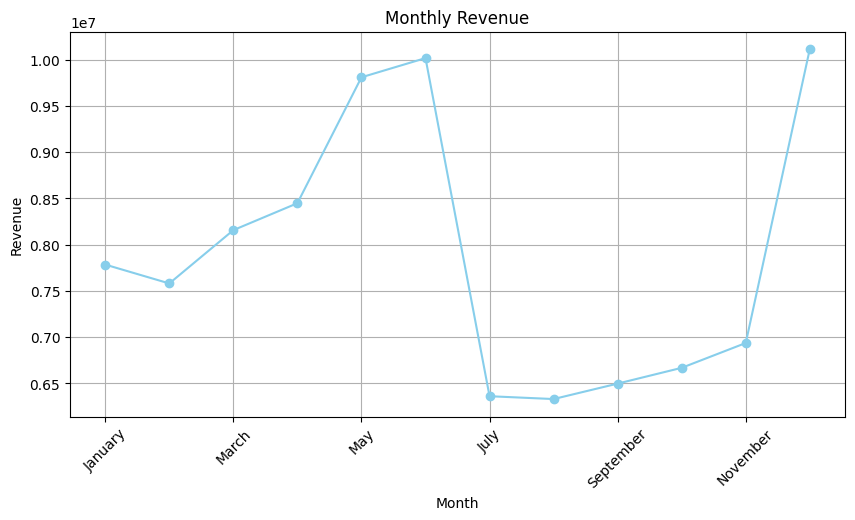

In [95]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
monthly_revenue.plot(kind='line', title='Monthly Revenue', marker= 'o', figsize=(10,5), color='skyblue')
plt.ylabel('Revenue')
plt.grid()
plt.xticks(rotation = 45)
plt.show()

## Revenue by Age Group
**Key Observations:**
- **Top performer**: Adults (35-64) - ~\$47M total revenue
- **Second**: Young Adults (25-34) - ~\$35M
- **Lowest**: Youth (<25) - ~\$13M
- **Seniors (64+)**: Compared to the other ``Age Groups`` it is little

**Summary:** Core customer base is middle-aged adults with highest purchasing power.

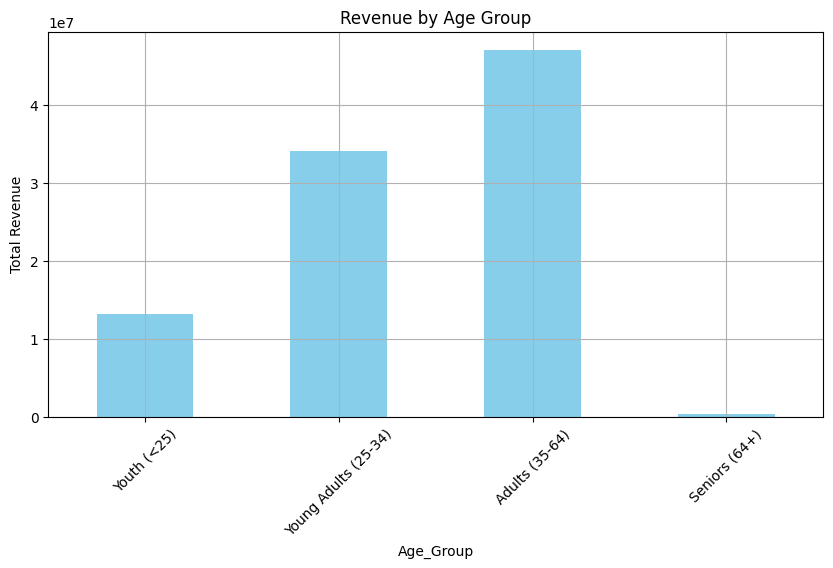

In [208]:
revenueByAge = df.groupby('Age_Group')['Revenue'].sum().reindex(['Youth (<25)','Young Adults (25-34)','Adults (35-64)','Seniors (64+)'])
revenueByAge.plot(kind = 'bar', figsize=(10,5), color = 'skyblue')
plt.title('Revenue by Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

## Profit by Sub_Category
**Key Observations:**
- **Highest profit**: Road Bikes (\~\$14M), Mountain Bikes (\~\\$10.5M)
- **Moderate profit**: Helmets (\~\$4M), Tires and Tubes (\~\\$3M)
- **Lowest profit**: Socks, Caps, Cleaners (<\$1M each)

**Summary:** Bikes generate the highest profit margins despite lower order volumes.

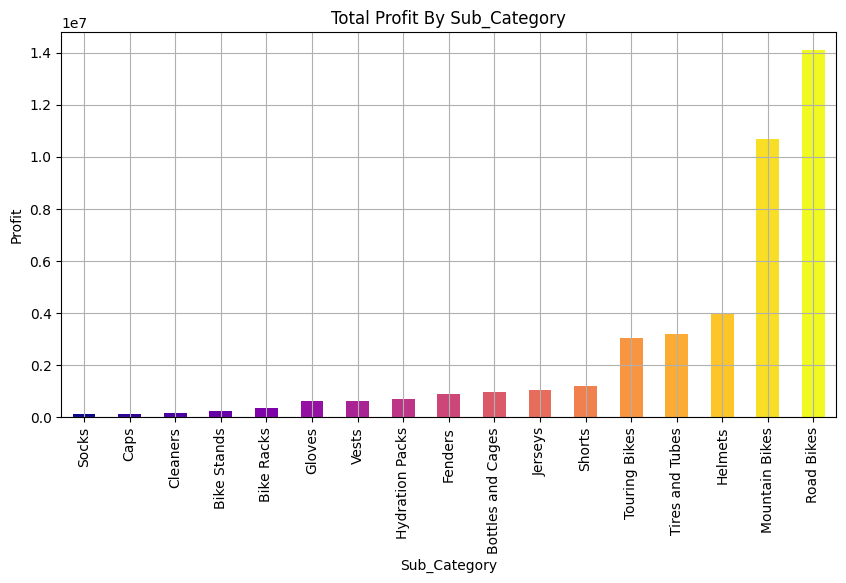

In [209]:
profitBySubCategory = df.groupby('Sub_Category')['Profit'].sum().sort_values()
#colors = plt.get_cmap('Set1').colors
colors = plt.cm.plasma(np.linspace(0, 1, 17))
profitBySubCategory.plot(kind='bar',figsize=(10,5),color =colors)
plt.title('Total Profit By Sub_Category')
plt.ylabel('Profit')
plt.grid()
plt.show()

## Top 10 Products by Revenue
**Key Observations:**
- **Top performer**: Road-150 Red, 62 (\~\$4.2M)
- **Strong performers**: Mountain-200 series and Road-150 variants dominate top 10
- **Product focus**: Bikes (specifically Road and Mountain series) drive revenue

**Summary:** Premium bike models are the revenue champions.

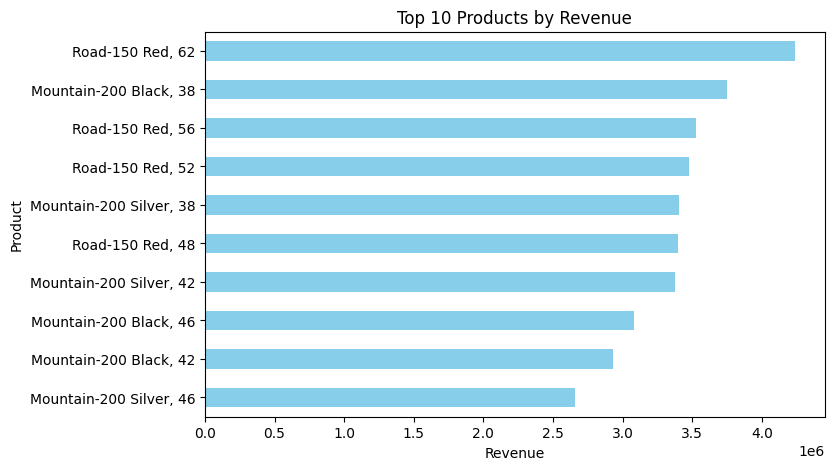

In [181]:
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Products by Revenue', figsize=(8,5), color='skyblue')
plt.xlabel('Revenue')
plt.gca().invert_yaxis()
plt.show()

## Revenue by Country
**Key Observations:**
- **Dominant market**: United States (\~30M, >40% of total)
- **Second tier**: Australia (\~\$25M)
- **Third tier**: UK (\~\$11M), Germany (\~\\$10M), France (\~\\$10M)
- **Smallest**: Canada (\~\$8M)

**Summary:** US market dominance with strong international presence in English-speaking countries.

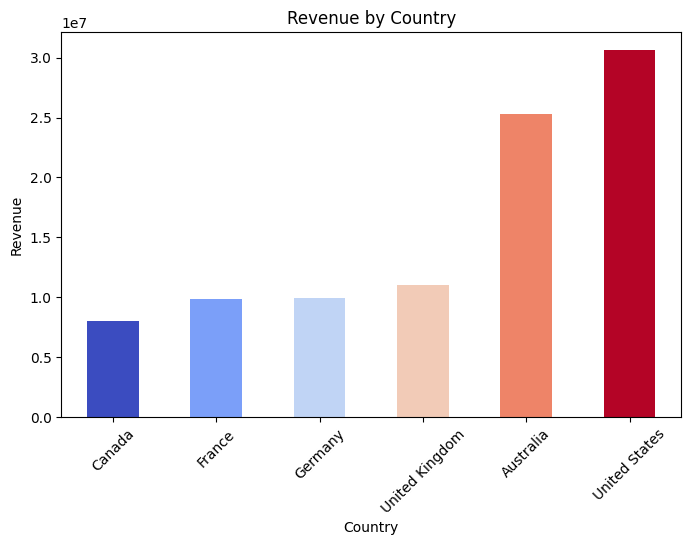

In [195]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values()
colors = plt.cm.coolwarm(np.linspace(0, 1, 6))
country_revenue.plot(kind='bar', title='Revenue by Country', figsize=(8,5), color=colors)
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

## Correlation Analysis
**Key Observations:**
- **Strongest correlations**: Cost-Revenue (0.99), Revenue-Profit (0.99)
- **Perfect correlations**: Unit_Cost-Unit_Price (1.0)
- **Negative correlations**: Order_Quantity vs Unit_Cost/Price (-0.52)

**Summary:** Higher-priced, lower-volume products drive profitability. Volume and price are inversely related.

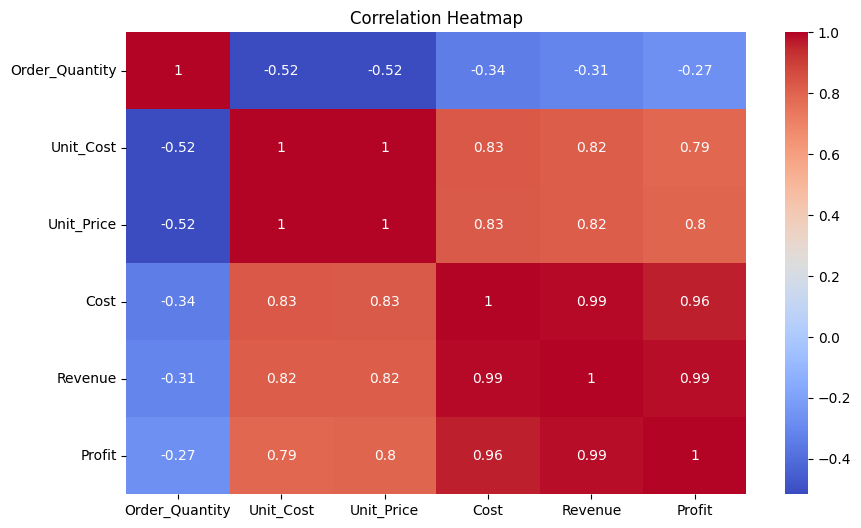

In [197]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Order_Quantity','Unit_Cost','Unit_Price','Cost','Revenue','Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()